# Machine Learning Fundamentals and Applications

#### Project
#### Course      : CS 559
#### Name        : Rohit Pradhan, Aditi Duggal
#### CWID        : 10468609,10460663

# START

## Importing Libraries

In [ ]:
!pip install catboost

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import NuSVC

import tensorflow as tf
tf.__version__


'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle Dataset"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle Dataset

/content/gdrive/My Drive/Kaggle Dataset


In [ ]:
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 35.2MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  weather-dataset-rattle-package.zip
replace weatherAUS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Importing Dataset

In [ ]:
df= pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Exploratory Data Analysis

In [ ]:
df.shape

(145460, 23)

In [ ]:
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

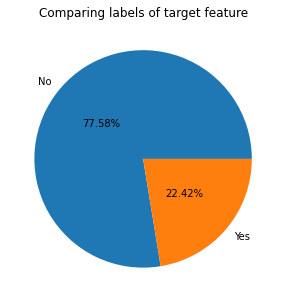

In [ ]:
values = df['RainTomorrow'].value_counts().values.tolist()
labels = df['RainTomorrow'].value_counts().index
plt.figure(figsize= (5,5))
plt.title('Comparing labels of target feature')
plt.pie(x = values, labels = labels, autopct='%1.2f%%', pctdistance= 0.5)
plt.show()

In [ ]:
feat=['RainTomorrow','Cloud9am','Cloud3pm','RainToday','WindGustDir','WindDir9am','WindDir3pm']
for i in feat:
  df[i].fillna(df[i].mode()[0],inplace=True)

df[i].isnull().sum()

0

In [ ]:
print(df['RainTomorrow'].value_counts())
df['RainToday'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64


No     113580
Yes     31880
Name: RainToday, dtype: int64

### Dropping Null values

In [ ]:
df.dropna(axis=0,inplace=True)
df.shape

(65646, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


### Label encoding the last two columns

In [ ]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)

Here we can clearly see that there is imbalance in the target variable

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          uint8
RainTomorrow       uint8
dtype: object

In [ ]:
df["RainToday"]=df["RainToday"].astype('int64')
df["RainTomorrow"]=df["RainTomorrow"].astype('int64')

### Heat map for correlation

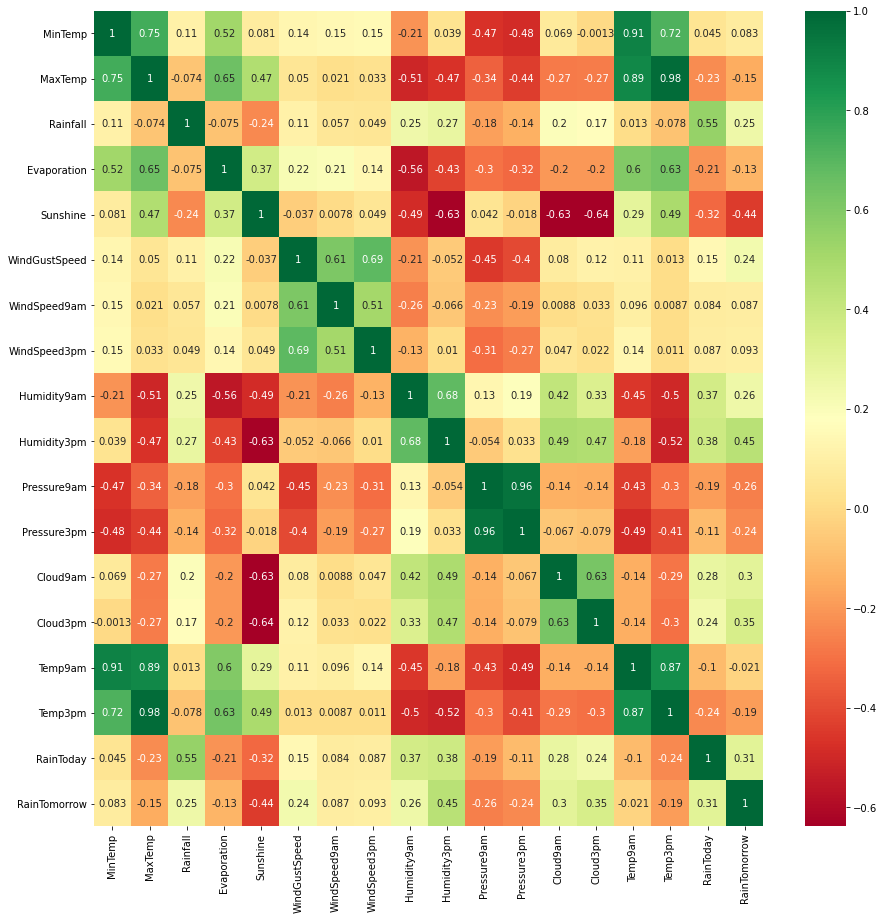

In [ ]:
# corr() -> to find coreeltion between numneric values
corrmat=df.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(15,15)) 
#plot heat map 
#heighesst value -> highly corelates
# sighs represent proportinality 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Removal of Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

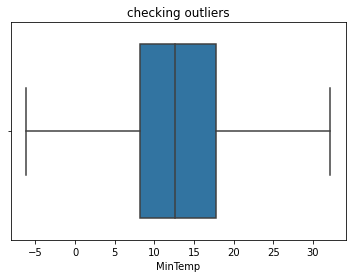

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['MinTemp'], 25), percentile(df['MinTemp'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)

df.loc[df['MinTemp']>=upper,'MinTemp']=upper
df.loc[df['MinTemp']<=lower,'MinTemp']=lower

sns.boxplot(df['MinTemp'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  1.6999999999999993
U 45.7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

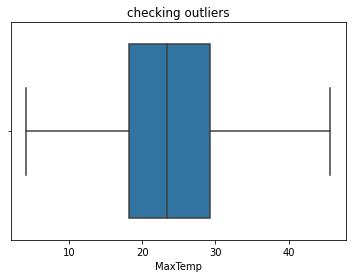

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['MaxTemp'], 25), percentile(df['MaxTemp'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['MaxTemp']>=upper,'MaxTemp']=upper
df.loc[df['MaxTemp']<=lower,'MaxTemp']=lower

sns.boxplot(df['MaxTemp'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -0.8999999999999999
U 1.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

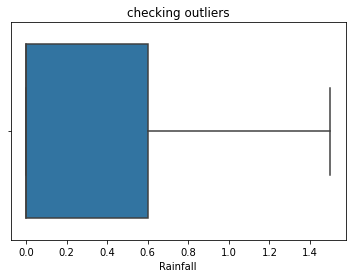

<Figure size 1080x1080 with 0 Axes>

In [ ]:

from numpy import percentile
q25, q75 = np.percentile(df['Rainfall'], 25), percentile(df['Rainfall'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Rainfall']>=upper,'Rainfall']=upper
df.loc[df['Rainfall']<=lower,'Rainfall']=lower

sns.boxplot(df['Rainfall'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -4.299999999999999
U 14.1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

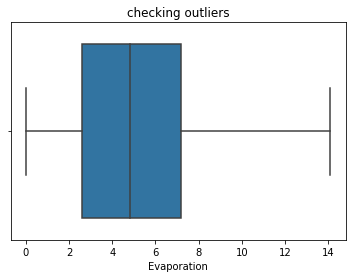

<Figure size 1080x1080 with 0 Axes>

In [ ]:

from numpy import percentile
q25, q75 = np.percentile(df['Evaporation'], 25), percentile(df['Evaporation'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Evaporation']>=upper,'Evaporation']=upper
df.loc[df['Evaporation']<=lower,'Evaporation']=lower

sns.boxplot(df['Evaporation'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -3.799999999999999
U 19.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

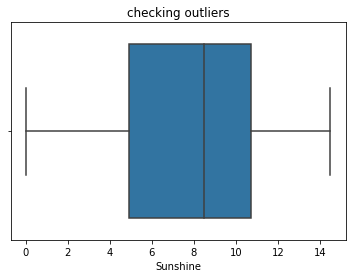

<Figure size 1080x1080 with 0 Axes>

In [ ]:

from numpy import percentile
q25, q75 = np.percentile(df['Sunshine'], 25), percentile(df['Sunshine'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Sunshine']>=upper,'Sunshine']=upper
df.loc[df['Sunshine']<=lower,'Sunshine']=lower

sns.boxplot(df['Sunshine'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -3.799999999999999
U 19.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

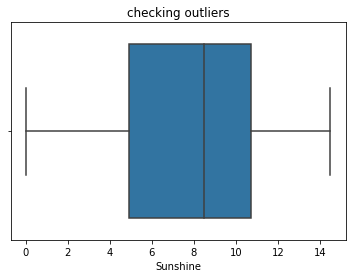

<Figure size 1080x1080 with 0 Axes>

In [ ]:

from numpy import percentile
q25, q75 = np.percentile(df['Sunshine'], 25), percentile(df['Sunshine'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Sunshine']>=upper,'Sunshine']=upper
df.loc[df['Sunshine']<=lower,'Sunshine']=lower

sns.boxplot(df['Sunshine'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  5.5
U 73.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

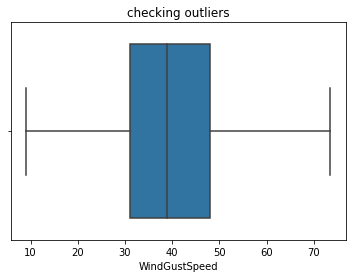

<Figure size 1080x1080 with 0 Axes>

In [ ]:

from numpy import percentile
q25, q75 = np.percentile(df['WindGustSpeed'], 25), percentile(df['WindGustSpeed'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['WindGustSpeed']>=upper,'WindGustSpeed']=upper
df.loc[df['WindGustSpeed']<=lower,'WindGustSpeed']=lower

sns.boxplot(df['WindGustSpeed'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -7.5
U 36.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

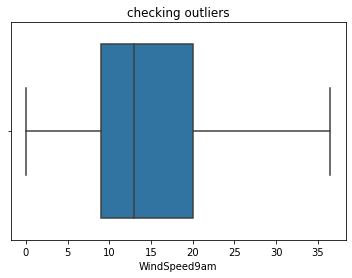

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['WindSpeed9am'], 25), percentile(df['WindSpeed9am'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['WindSpeed9am']>=upper,'WindSpeed9am']=upper
df.loc[df['WindSpeed9am']<=lower,'WindSpeed9am']=lower

sns.boxplot(df['WindSpeed9am'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -3.5
U 40.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

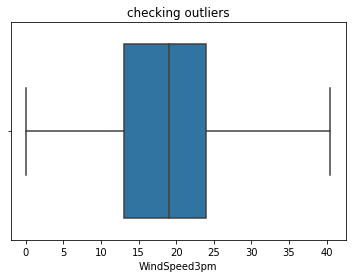

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['WindSpeed3pm'], 25), percentile(df['WindSpeed3pm'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['WindSpeed3pm']>=upper,'WindSpeed3pm']=upper
df.loc[df['WindSpeed3pm']<=lower,'WindSpeed3pm']=lower

sns.boxplot(df['WindSpeed3pm'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))



L  17.5
U 117.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

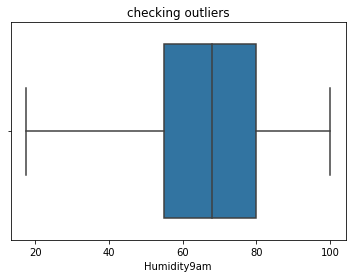

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Humidity9am'], 25), percentile(df['Humidity9am'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Humidity9am']>=upper,'Humidity9am']=upper
df.loc[df['Humidity9am']<=lower,'Humidity9am']=lower

sns.boxplot(df['Humidity9am'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -4.5
U 103.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

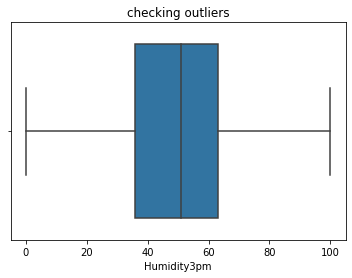

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Humidity3pm'], 25), percentile(df['Humidity3pm'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Humidity3pm']>=upper,'Humidity3pm']=upper
df.loc[df['Humidity3pm']<=lower,'Humidity3pm']=lower

sns.boxplot(df['Humidity3pm'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))


L  998.6000000000001
U 1036.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

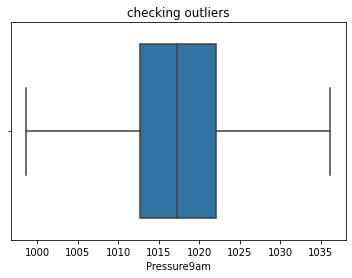

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Pressure9am'], 25), percentile(df['Pressure9am'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Pressure9am']>=upper,'Pressure9am']=upper
df.loc[df['Pressure9am']<=lower,'Pressure9am']=lower

sns.boxplot(df['Pressure9am'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))



L  995.95
U 1033.95


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

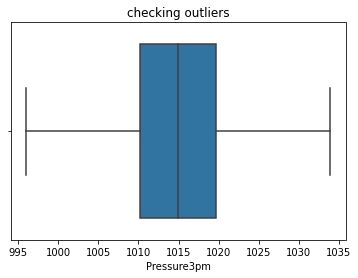

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Pressure3pm'], 25), percentile(df['Pressure3pm'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Pressure3pm']>=upper,'Pressure3pm']=upper
df.loc[df['Pressure3pm']<=lower,'Pressure3pm']=lower

sns.boxplot(df['Pressure3pm'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -8.0
U 16.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

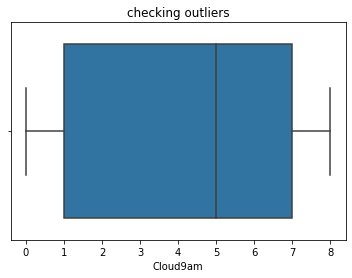

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Cloud9am'], 25), percentile(df['Cloud9am'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Cloud9am']>=upper,'Cloud9am']=upper
df.loc[df['Cloud9am']<=lower,'Cloud9am']=lower

sns.boxplot(df['Cloud9am'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))


L  -5.5
U 14.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

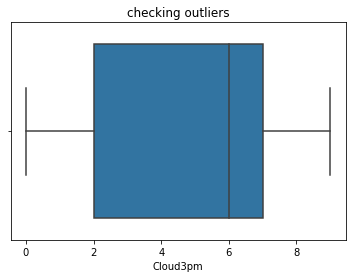

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Cloud3pm'], 25), percentile(df['Cloud3pm'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Cloud3pm']>=upper,'Cloud3pm']=upper
df.loc[df['Cloud3pm']<=lower,'Cloud3pm']=lower

sns.boxplot(df['Cloud3pm'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  -2.549999999999999
U 37.849999999999994


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

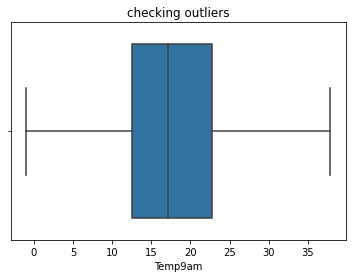

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Temp9am'], 25), percentile(df['Temp9am'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Temp9am']>=upper,'Temp9am']=upper
df.loc[df['Temp9am']<=lower,'Temp9am']=lower

sns.boxplot(df['Temp9am'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

L  1.1499999999999986
U 43.15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

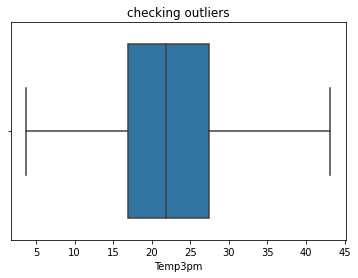

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from numpy import percentile
q25, q75 = np.percentile(df['Temp3pm'], 25), percentile(df['Temp3pm'], 75)
iqr = q75 - q25
lower=q25 - (iqr*1.5)
upper=q75 + (iqr*1.5)
print("L ", lower)
print("U",upper)
df.loc[df['Temp3pm']>=upper,'Temp3pm']=upper
df.loc[df['Temp3pm']<=lower,'Temp3pm']=lower

sns.boxplot(df['Temp3pm'])
plt.title('checking outliers')
plt.figure(figsize=(15,15))

### Splitting Dataset into Input and Outputs

In [ ]:
X = df.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
y.shape

(65646,)

In [ ]:
y.value_counts()

0    51216
1    14430
Name: RainTomorrow, dtype: int64

### Visualizing Best features using SkLearn Library 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
max(model.feature_importances_)

[0.04454736 0.04332935 0.04628411 0.04455289 0.11710524 0.06760376
 0.04226872 0.0432662  0.0506171  0.14304599 0.05889731 0.06882067
 0.04296786 0.06048087 0.04427053 0.04541655 0.03652547]


0.14304598764849094

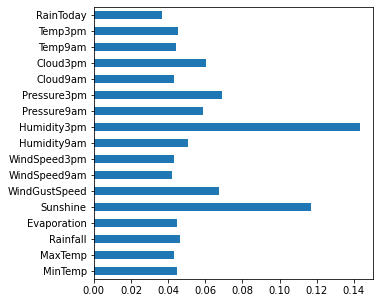

In [ ]:
#plot graph of feature importances for better visualization 
plt.figure(figsize=(5,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.plot(kind='barh')
plt.show()

## Splitting the Dataset set into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Sampling of Output variable

As there is imbalance in the percentage of target we create sample of data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_res.shape)
y_res.shape

(71780, 17)


(71780,)

# Model Building

In [ ]:
result=[]
result1=[]
result2=[]

## logistic Regression

In [ ]:
lgr=LogisticRegression()

lgr.fit(X_res,y_res)

lgr_y_pred=lgr.predict(X_test)

lgr_y_pred_train=lgr.predict(X_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cm=confusion_matrix(y_test,lgr_y_pred)
print(cm)

acc=accuracy_score(y_test,lgr_y_pred)
print(acc)

train_acc_lgr=accuracy_score(y_res,lgr_y_pred_train)
print("training error is = ",train_acc_lgr)

print(classification_report(y_test,lgr_y_pred))

acc_lgr=accuracy_score(y_test,lgr_y_pred)  
result.append(acc_lgr)
result2.append(train_acc_lgr)

[[12325  3001]
 [  988  3380]]
0.7974510003046613
training error is =  0.7931875174143216
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     15326
           1       0.53      0.77      0.63      4368

    accuracy                           0.80     19694
   macro avg       0.73      0.79      0.74     19694
weighted avg       0.84      0.80      0.81     19694



## Support Vector Classifier

In [ ]:
sv=NuSVC()

sv.fit(X_res,y_res)

sv_y_pred=sv.predict(X_test)

sv_y_pred_train=sv.predict(X_res)

In [ ]:
cm=confusion_matrix(y_test,sv_y_pred)
print(cm)

acc=accuracy_score(y_test,sv_y_pred)
print(acc)

train_acc_sv=accuracy_score(y_res,sv_y_pred_train)
print("training error is = ",train_acc_sv)

print(classification_report(y_test,sv_y_pred))

acc_sv=accuracy_score(y_test,sv_y_pred)  
result.append(acc_sv)
result2.append(train_acc_sv)

[[12413  2913]
 [  946  3422]]
0.804051995531634
training error is =  0.7995541933686263
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     15326
           1       0.54      0.78      0.64      4368

    accuracy                           0.80     19694
   macro avg       0.73      0.80      0.75     19694
weighted avg       0.84      0.80      0.82     19694



## Random Forest

In [ ]:
rf=RandomForestClassifier()

rf.fit(X_res,y_res)

rf_y_pred=rf.predict(X_test)

rf_y_pred_train=rf.predict(X_res)

In [ ]:
cm=confusion_matrix(y_test,rf_y_pred)
print(cm)

acc=accuracy_score(y_test,rf_y_pred)
print(acc)

train_acc_rf=accuracy_score(y_res,rf_y_pred_train)
print("training error is = ",train_acc_rf)

print(classification_report(y_test,rf_y_pred))
acc_rf=accuracy_score(y_test,rf_y_pred)  
result.append(acc_rf)
result2.append(train_acc_rf)

[[14087  1239]
 [ 1640  2728]]
0.8538133441657357
training error is =  1.0
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     15326
           1       0.69      0.62      0.65      4368

    accuracy                           0.85     19694
   macro avg       0.79      0.77      0.78     19694
weighted avg       0.85      0.85      0.85     19694



## Naive Bayes

In [ ]:
nb=GaussianNB()

nb.fit(X_res,y_res)

nb_y_pred=nb.predict(X_test)

nb_y_pred_train=nb.predict(X_res)

In [ ]:
cm=confusion_matrix(y_test,nb_y_pred)
print(cm)

acc=accuracy_score(y_test,nb_y_pred)
print(acc)

train_acc_nb=accuracy_score(y_res,nb_y_pred_train)
print("training error is = ",train_acc_nb)

print(classification_report(y_test,nb_y_pred))
acc_nb=accuracy_score(y_test,nb_y_pred)  
result.append(acc_nb)
result2.append(train_acc_nb)

[[11556  3770]
 [  989  3379]]
0.7583527978064385
training error is =  0.7682641404290889
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     15326
           1       0.47      0.77      0.59      4368

    accuracy                           0.76     19694
   macro avg       0.70      0.76      0.71     19694
weighted avg       0.82      0.76      0.78     19694



## K-Nearest Neighbors

In [ ]:
knn= KNeighborsClassifier()

knn.fit(X_res, y_res)

knn_y_pred=knn.predict(X_test)

knn_y_pred_train=knn.predict(X_res)

In [ ]:
cm=confusion_matrix(y_test,knn_y_pred)
print(cm)

acc=accuracy_score(y_test,knn_y_pred)
print(acc)

train_acc_knn=accuracy_score(y_res,knn_y_pred_train)
print("training error is = ",train_acc_knn)

print(classification_report(y_test,knn_y_pred))
acc_knn=accuracy_score(y_test,knn_y_pred)  
result.append(acc_knn)
result2.append(train_acc_knn)

[[11638  3688]
 [ 1071  3297]]
0.7583527978064385
training error is =  0.9041237113402062
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     15326
           1       0.47      0.75      0.58      4368

    accuracy                           0.76     19694
   macro avg       0.69      0.76      0.71     19694
weighted avg       0.82      0.76      0.77     19694



## XG-Boost Classifier

In [ ]:

xg= XGBClassifier()

xg.fit(X_res, y_res)

xg_y_pred=xg.predict(X_test.values)

xg_y_pred_train=xg.predict(X_res)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,xg_y_pred)
print(cm)

acc=accuracy_score(y_test,xg_y_pred)
print(acc)

train_acc_xg=accuracy_score(y_res,xg_y_pred_train)
print("training error is = ",train_acc_xg)

print(classification_report(y_test,xg_y_pred))
acc_xg=accuracy_score(y_test,xg_y_pred)  
result.append(acc_xg)
result2.append(train_acc_xg)

[[13641  1685]
 [ 1461  2907]]
0.8402559155072611
training error is =  0.8792421287266649
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     15326
           1       0.63      0.67      0.65      4368

    accuracy                           0.84     19694
   macro avg       0.77      0.78      0.77     19694
weighted avg       0.84      0.84      0.84     19694



## Gradient Boosting Classifier

In [ ]:
gb= GradientBoostingClassifier()

gb.fit(X_res, y_res)

gb_y_pred=gb.predict(X_test)

gb_y_pred_train=gb.predict(X_res)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,gb_y_pred)
print(cm)

acc=accuracy_score(y_test,gb_y_pred)
print(acc)

train_acc_gb=accuracy_score(y_res,gb_y_pred_train)
print("training error is = ",train_acc_gb)

print(classification_report(y_test,gb_y_pred))
acc_gb=accuracy_score(y_test,gb_y_pred)  
result.append(acc_gb)
result2.append(train_acc_gb)

[[13601  1725]
 [ 1455  2913]]
0.8385295013709759
training error is =  0.8780161604903873
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     15326
           1       0.63      0.67      0.65      4368

    accuracy                           0.84     19694
   macro avg       0.77      0.78      0.77     19694
weighted avg       0.84      0.84      0.84     19694



## Ada boost Classifier

In [ ]:
ada= AdaBoostClassifier()

ada.fit(X_res, y_res)

ada_y_pred=ada.predict(X_test)

ada_y_pred_train=ada.predict(X_res)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,ada_y_pred)
print(cm)

acc=accuracy_score(y_test,ada_y_pred)
print(acc)

train_acc_ada=accuracy_score(y_res,ada_y_pred_train)
print("training error is = ",train_acc_ada)

print(classification_report(y_test,ada_y_pred))

acc_ada=accuracy_score(y_test,ada_y_pred)  
result.append(acc_ada)
result2.append(train_acc_ada)

[[12982  2344]
 [ 1324  3044]]
0.8137503808266477
training error is =  0.8386319308999721
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     15326
           1       0.56      0.70      0.62      4368

    accuracy                           0.81     19694
   macro avg       0.74      0.77      0.75     19694
weighted avg       0.83      0.81      0.82     19694



## CatBoost Classifier

In [ ]:
cat = CatBoostClassifier()

cat.fit(X_res,y_res)

ca_y_pred=cat.predict(X_test)

ca_y_pred_train=cat.predict(X_res)

Learning rate set to 0.063892
0:	learn: 0.6442368	total: 82.8ms	remaining: 1m 22s
1:	learn: 0.6054653	total: 111ms	remaining: 55.4s
2:	learn: 0.5784722	total: 139ms	remaining: 46.1s
3:	learn: 0.5505029	total: 167ms	remaining: 41.6s
4:	learn: 0.5284714	total: 203ms	remaining: 40.4s
5:	learn: 0.5104219	total: 230ms	remaining: 38.2s
6:	learn: 0.4961327	total: 258ms	remaining: 36.6s
7:	learn: 0.4841470	total: 289ms	remaining: 35.9s
8:	learn: 0.4730169	total: 316ms	remaining: 34.8s
9:	learn: 0.4626117	total: 346ms	remaining: 34.2s
10:	learn: 0.4536440	total: 374ms	remaining: 33.7s
11:	learn: 0.4468698	total: 402ms	remaining: 33.1s
12:	learn: 0.4360785	total: 430ms	remaining: 32.7s
13:	learn: 0.4281890	total: 458ms	remaining: 32.3s
14:	learn: 0.4228408	total: 485ms	remaining: 31.8s
15:	learn: 0.4162860	total: 512ms	remaining: 31.5s
16:	learn: 0.4092189	total: 540ms	remaining: 31.2s
17:	learn: 0.4025453	total: 567ms	remaining: 30.9s
18:	learn: 0.3990502	total: 598ms	remaining: 30.9s
19:	learn

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,ca_y_pred)
print(cm)

acc=accuracy_score(y_test,ca_y_pred)
print(acc)

train_acc_cat=accuracy_score(y_res,ca_y_pred_train)
print("training error is = ",train_acc_cat)

print(classification_report(y_test,ca_y_pred))

acc_cat=accuracy_score(y_test,ca_y_pred)  
result.append(acc_cat)
result2.append(train_acc_cat)

[[14455   871]
 [ 1853  2515]]
0.8616837615517416
training error is =  0.9361382000557258
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15326
           1       0.74      0.58      0.65      4368

    accuracy                           0.86     19694
   macro avg       0.81      0.76      0.78     19694
weighted avg       0.85      0.86      0.86     19694



## Artificial Neural Network

In [ ]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.25))

ann.add(tf.keras.layers.Dense(units=9,activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.25))

ann.add(tf.keras.layers.Dense(units=9,activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.25))

ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_res, y_res, batch_size =32 , epochs = 50)

#callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=5)]

Epoch 1/50
2244/2244 [==============================] - 8s 2ms/step - loss: 2.0819 - accuracy: 0.5030
Epoch 2/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.5469 - accuracy: 0.7443
Epoch 3/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4749 - accuracy: 0.7771
Epoch 4/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4609 - accuracy: 0.7826
Epoch 5/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4509 - accuracy: 0.7884
Epoch 6/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4507 - accuracy: 0.7891
Epoch 7/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4502 - accuracy: 0.7872
Epoch 8/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4515 - accuracy: 0.7858
Epoch 9/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.4487 - accuracy: 0.7879
Epoch 10/50
2244/2244 [==============================] - 5s 2ms/step - loss: 0.450

In [ ]:
ann_y_pred = ann.predict(X_test)

ann_y_pred = (ann_y_pred > 0.5)

ann_y_pred_train=ann.predict(X_res)

ann_y_pred_train = (ann_y_pred_train > 0.5)

In [ ]:
cm=confusion_matrix(y_test,ann_y_pred)
print(cm)

acc=accuracy_score(y_test,ann_y_pred)
print(acc)

train_acc_ann=accuracy_score(y_res,ann_y_pred_train)
print("training error is = ",train_acc_ann)

print(classification_report(y_test,ann_y_pred))

acc_ann=accuracy_score(y_test,ann_y_pred)  
result.append(acc_ann)
result2.append(train_acc_ann)

[[12739  2587]
 [ 1098  3270]]
0.8128871737585052
training error is =  0.7917247144051268
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     15326
           1       0.56      0.75      0.64      4368

    accuracy                           0.81     19694
   macro avg       0.74      0.79      0.76     19694
weighted avg       0.84      0.81      0.82     19694



# Comparision of Model performance based on ROC

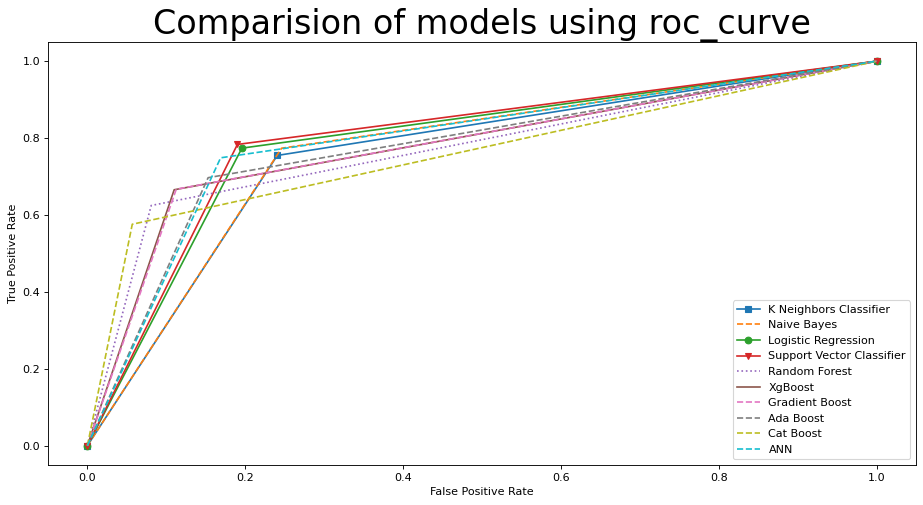

In [ ]:
########Comparision of models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

lgr_fpr, lgr_tpr, _ = roc_curve(y_test, lgr_y_pred)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_y_pred)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_y_pred)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_y_pred)
cat_fpr, cat_tpr, _ = roc_curve(y_test, ca_y_pred)
ann_fpr, ann_tpr, _ = roc_curve(y_test, ann_y_pred)

# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='s', label='K Neighbors Classifier')
pyplot.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes')
pyplot.plot(lgr_fpr, lgr_tpr, marker='o', label='Logistic Regression')
pyplot.plot(sv_fpr, sv_tpr, marker='v', label='Support Vector Classifier')
pyplot.plot(rf_fpr, rf_tpr, linestyle=':', label='Random Forest')
pyplot.plot(xg_fpr, xg_tpr, linestyle='-', label='XgBoost')
pyplot.plot(gb_fpr, gb_tpr, linestyle='--', label='Gradient Boost')
pyplot.plot(ada_fpr, ada_tpr, linestyle='--', label='Ada Boost')
pyplot.plot(cat_fpr, cat_tpr, linestyle='--', label='Cat Boost')
pyplot.plot(ann_fpr, ann_tpr, linestyle='--', label='ANN')
# axis labels

# incorrectly predicts the positive class
pyplot.xlabel('False Positive Rate')

# correctly predicts the positive class
pyplot.ylabel('True Positive Rate')

pyplot.title("Comparision of models using roc_curve", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Printing values for AUC

k=auc(knn_fpr, knn_tpr)
result1.append(k)

n=auc(nb_fpr, nb_tpr)
result1.append(n)

l=auc(lgr_fpr, lgr_tpr)
result1.append(l)

s=auc(sv_fpr, sv_tpr)
result1.append(s)

r=auc(rf_fpr, rf_tpr)
result1.append(r)

x=auc(xg_fpr, xg_tpr)
result1.append(x)

g=auc(gb_fpr, gb_tpr)
result1.append(g)

a=auc(ada_fpr, ada_tpr)
result1.append(a)

c=auc(cat_fpr, cat_tpr)
result1.append(c)

an=auc(ann_fpr,ann_tpr)
result1.append(an)



## Printing Results

In [ ]:
results = pd.DataFrame({ "Models":["KNN",
                                  "Naive Bayes",
                                  "Logistic",
                                  "SVC",
                                  "RandomForest",
                                  "XG-Boost",
                                   "GradientBoost",
                                   "AdaBoost",
                                   "Catboost",
                                   "ANN"
                                  ],
                        "Train Accuracy":result2,
                        "Model Accuracy":result,
                        "AUC":result1
                        })

In [ ]:
results

,Models,Train Accuracy,Model Accuracy,AUC
0,KNN,0.793188,0.797451,0.757085
1,Naive Bayes,0.799554,0.804052,0.763797
2,Logistic,1.000000,0.853813,0.788999
3,SVC,0.768264,0.758353,0.796678
4,RandomForest,0.904124,0.758353,0.771850
5,XG-Boost,0.879242,0.840256,0.777789
6,GradientBoost,0.878016,0.838530,0.777171
7,AdaBoost,0.838632,0.813750,0.771972
8,Catboost,0.936138,0.861684,0.759473
9,ANN,0.791725,0.812887,0.789914


# HyperParameter tuning

In [ ]:

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("Mean and Standard Deviation for :", params)
        print('{}, (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        print("-------------------------------------------")

In [ ]:
ad1 = AdaBoostClassifier()
parameters = {
    'n_estimators': [100,200,300],
    'learning_rate':[1]
    
}
cv = GridSearchCV(ad1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

BEST PARAMS: {'learning_rate': 1, 'n_estimators': 300}

Mean and Standard Deviation for : {'learning_rate': 1, 'n_estimators': 100}
0.851, (+/-0.104) for {'learning_rate': 1, 'n_estimators': 100}
-------------------------------------------
Mean and Standard Deviation for : {'learning_rate': 1, 'n_estimators': 200}
0.866, (+/-0.127) for {'learning_rate': 1, 'n_estimators': 200}
-------------------------------------------
Mean and Standard Deviation for : {'learning_rate': 1, 'n_estimators': 300}
0.875, (+/-0.14) for {'learning_rate': 1, 'n_estimators': 300}
-------------------------------------------


In [ ]:
lgr1 = LogisticRegression()
parameters = {
    "penalty":['l1','l2'],
    "C": np.logspace(-4,4,20),
    "max_iter":[200,500]
}
cv = GridSearchCV(lgr1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

BEST PARAMS: {'C': 4.281332398719396, 'max_iter': 500, 'penalty': 'l2'}

Mean and Standard Deviation for : {'C': 0.0001, 'max_iter': 200, 'penalty': 'l1'}
nan, (+/-nan) for {'C': 0.0001, 'max_iter': 200, 'penalty': 'l1'}
-------------------------------------------
Mean and Standard Deviation for : {'C': 0.0001, 'max_iter': 200, 'penalty': 'l2'}
0.793, (+/-0.01) for {'C': 0.0001, 'max_iter': 200, 'penalty': 'l2'}
-------------------------------------------
Mean and Standard Deviation for : {'C': 0.0001, 'max_iter': 500, 'penalty': 'l1'}
nan, (+/-nan) for {'C': 0.0001, 'max_iter': 500, 'penalty': 'l1'}
-------------------------------------------
Mean and Standard Deviation for : {'C': 0.0001, 'max_iter': 500, 'penalty': 'l2'}
0.794, (+/-0.009) for {'C': 0.0001, 'max_iter': 500, 'penalty': 'l2'}
-------------------------------------------
Mean and Standard Deviation for : {'C': 0.00026366508987303583, 'max_iter': 200, 'penalty': 'l1'}
nan, (+/-nan) for {'C': 0.00026366508987303583, 'max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
rf1=RandomForestClassifier()
parameters={
    'n_estimators': [100,200,300],
    'criterion':['gini', 'entropy'],
    'max_features':['sqrt', 'log2'],
    'max_depth': [2,4],
    'min_samples_split':[2,5]
}

cv = GridSearchCV(rf1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

BEST PARAMS: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}

Mean and Standard Deviation for : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
0.78, (+/-0.035) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
-------------------------------------------
Mean and Standard Deviation for : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
0.781, (+/-0.035) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
-------------------------------------------
Mean and Standard Deviation for : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
0.781, (+/-0.032) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_

In [ ]:
knn1 = KNeighborsClassifier()
parameters = {
    'n_neighbors':[2,3,4,5],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1,2]
}
cv = GridSearchCV(knn1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

BEST PARAMS: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}

Mean and Standard Deviation for : {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
0.923, (+/-0.025) for {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
-------------------------------------------
Mean and Standard Deviation for : {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}
0.916, (+/-0.026) for {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}
-------------------------------------------
Mean and Standard Deviation for : {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
0.887, (+/-0.017) for {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
-------------------------------------------
Mean and Standard Deviation for : {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
0.877, (+/-0.015) for {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
-------------------------------------------
Mean and Standard Deviation for : {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
0.897, (+/-0.03) for {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
---

In [ ]:
gb1=GradientBoostingClassifier()
parameters={
    'n_estimators': [300,400],
    'criterion':['friedman_mse'],
    'max_depth': [2,4]
}

cv = GridSearchCV(gb1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

BEST PARAMS: {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 400}

Mean and Standard Deviation for : {'criterion': 'friedman_mse', 'max_depth': 2, 'n_estimators': 300}
0.883, (+/-0.16) for {'criterion': 'friedman_mse', 'max_depth': 2, 'n_estimators': 300}
-------------------------------------------
Mean and Standard Deviation for : {'criterion': 'friedman_mse', 'max_depth': 2, 'n_estimators': 400}
0.888, (+/-0.171) for {'criterion': 'friedman_mse', 'max_depth': 2, 'n_estimators': 400}
-------------------------------------------
Mean and Standard Deviation for : {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 300}
0.898, (+/-0.184) for {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 300}
-------------------------------------------
Mean and Standard Deviation for : {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 400}
0.899, (+/-0.189) for {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 400}
----------------------------

In [ ]:
xg1=XGBClassifier()
parameters={
    'n_estimators': [100,200,300],
    'max_depth': [2,3,4],
    'learning_rate':[0.05,0.1]
}

cv = GridSearchCV(xg1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

Mean and Standard Deviation for : {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
0.823, (+/-0.047) for {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
-------------------------------------------
Mean and Standard Deviation for : {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
0.852, (+/-0.088) for {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
-------------------------------------------
Mean and Standard Deviation for : {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}
0.866, (+/-0.117) for {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}
-------------------------------------------
Mean and Standard Deviation for : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.845, (+/-0.074) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
-------------------------------------------
Mean and Standard Deviation for : {'le

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
def build_clf():
  ann1 = tf.keras.models.Sequential()
  ann1.add(tf.keras.layers.Dense(units=11,activation='relu'))
  ann1.add(tf.keras.layers.Dense(units=11,activation='relu'))
  ann1.add(tf.keras.layers.Dense(units=11,activation='relu'))
  ann1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
  ann1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann1

ann1=KerasClassifier(build_fn=build_clf)

parameters={
    'batch_size': [64,128],
    'epochs':[500],
}

cv = GridSearchCV(ann1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

In [ ]:
ca1=CatBoostClassifier()
parameters={
    'iterations': [1500,2000,2500],
    'learning_rate':[0.05,0.1]
}

cv = GridSearchCV(ca1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

Streaming output truncated to the last 5000 lines.
20:	learn: 0.3426715	total: 716ms	remaining: 1m 24s
21:	learn: 0.3399061	total: 748ms	remaining: 1m 24s
22:	learn: 0.3357233	total: 779ms	remaining: 1m 23s
23:	learn: 0.3329967	total: 810ms	remaining: 1m 23s
24:	learn: 0.3306174	total: 844ms	remaining: 1m 23s
25:	learn: 0.3261713	total: 883ms	remaining: 1m 24s
26:	learn: 0.3243296	total: 914ms	remaining: 1m 23s
27:	learn: 0.3220586	total: 945ms	remaining: 1m 23s
28:	learn: 0.3204412	total: 977ms	remaining: 1m 23s
29:	learn: 0.3152517	total: 1.01s	remaining: 1m 23s
30:	learn: 0.3126055	total: 1.04s	remaining: 1m 22s
31:	learn: 0.3109144	total: 1.07s	remaining: 1m 22s
32:	learn: 0.3084940	total: 1.11s	remaining: 1m 23s
33:	learn: 0.3051028	total: 1.15s	remaining: 1m 23s
34:	learn: 0.3028592	total: 1.18s	remaining: 1m 23s
35:	learn: 0.3001883	total: 1.22s	remaining: 1m 23s
36:	learn: 0.2986817	total: 1.25s	remaining: 1m 23s
37:	learn: 0.2978174	total: 1.28s	remaining: 1m 23s
38:	learn: 0.

In [ ]:
from sklearn.svm import SVC
sv1=SVC()
parameters={
    'C': [0.1, 1],
    'gamma': [0.1],
    'kernel': ['rbf']
}

cv = GridSearchCV(sv1, parameters, cv=10)
cv.fit(X_res, y_res)

print_results(cv)

# Final model comaprision

## Logistic regression final

In [ ]:
result9=[]
result8=[]

In [ ]:
lgr2=LogisticRegression(C=4.281332398719396, max_iter=500, penalty='l2')

In [ ]:
lgr2.fit(X_res, y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_predict
lgr_y_pred_train2=cross_val_predict(lgr2, X_res,y_res, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
train_acc_lgr2=accuracy_score(y_res,lgr_y_pred_train2)
result8.append(train_acc_lgr2)

In [ ]:
from sklearn.model_selection import cross_val_predict
lgr_y_pred2=cross_val_predict(lgr2, X_test,y_test, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import accuracy_score
acc_lgr2=accuracy_score(y_test,lgr_y_pred2)
result9.append(acc_lgr2)

## Random forest Final

In [ ]:
rf2=RandomForestClassifier(criterion='gini', max_depth= 4, max_features='log2', min_samples_split=2, n_estimators=200)

In [ ]:
rf2.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_predict
rf_y_pred_train2=cross_val_predict(rf2, X_res,y_res, cv=10)

In [ ]:
train_acc_rf2=accuracy_score(y_res,rf_y_pred_train2)
result8.append(train_acc_rf2)

In [ ]:
from sklearn.model_selection import cross_val_predict
rf_y_pred2=cross_val_predict(rf2, X_test,y_test, cv=10)

In [ ]:
from sklearn.metrics import accuracy_score
acc_rf2=accuracy_score(y_test,rf_y_pred2)
result9.append(acc_rf2)

## KNN Final

In [ ]:
knn2=KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors=2, p=1)

In [ ]:
knn2.fit(X_res, y_res)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [ ]:
from sklearn.model_selection import cross_val_predict
knn_y_pred_train2=cross_val_predict(knn2, X_res,y_res, cv=10)

In [ ]:
train_acc_knn2=accuracy_score(y_res,knn_y_pred_train2)
result8.append(train_acc_knn2)

In [ ]:
from sklearn.model_selection import cross_val_predict
knn_y_pred2=cross_val_predict(knn2, X_test,y_test, cv=10)

In [ ]:
from sklearn.metrics import accuracy_score
acc_knn2=accuracy_score(y_test,knn_y_pred2)
result9.append(acc_knn2)

## CATBoost Final

In [ ]:
cat2=CatBoostClassifier(iterations= 2500, learning_rate= 0.05)

In [ ]:
cat2.fit(X_res, y_res)

0:	learn: 0.6541734	total: 57ms	remaining: 2m 22s
1:	learn: 0.6217132	total: 93.1ms	remaining: 1m 56s
2:	learn: 0.5988208	total: 129ms	remaining: 1m 47s
3:	learn: 0.5788372	total: 168ms	remaining: 1m 44s
4:	learn: 0.5564505	total: 202ms	remaining: 1m 40s
5:	learn: 0.5402150	total: 236ms	remaining: 1m 38s
6:	learn: 0.5226435	total: 275ms	remaining: 1m 38s
7:	learn: 0.5090462	total: 317ms	remaining: 1m 38s
8:	learn: 0.4975892	total: 361ms	remaining: 1m 39s
9:	learn: 0.4877864	total: 396ms	remaining: 1m 38s
10:	learn: 0.4783634	total: 430ms	remaining: 1m 37s
11:	learn: 0.4706671	total: 477ms	remaining: 1m 38s
12:	learn: 0.4633999	total: 512ms	remaining: 1m 38s
13:	learn: 0.4566518	total: 546ms	remaining: 1m 36s
14:	learn: 0.4494688	total: 581ms	remaining: 1m 36s
15:	learn: 0.4411735	total: 615ms	remaining: 1m 35s
16:	learn: 0.4352063	total: 649ms	remaining: 1m 34s
17:	learn: 0.4301160	total: 687ms	remaining: 1m 34s
18:	learn: 0.4255773	total: 721ms	remaining: 1m 34s
19:	learn: 0.4209355	t

In [ ]:
cat_y_pred_train2=cross_val_predict(cat2, X_res,y_res, cv=10)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6548061	total: 34.3ms	remaining: 1m 25s
1:	learn: 0.6221819	total: 69.1ms	remaining: 1m 26s
2:	learn: 0.5993042	total: 105ms	remaining: 1m 27s
3:	learn: 0.5752200	total: 140ms	remaining: 1m 27s
4:	learn: 0.5568717	total: 175ms	remaining: 1m 27s
5:	learn: 0.5409178	total: 214ms	remaining: 1m 29s
6:	learn: 0.5268592	total: 261ms	remaining: 1m 32s
7:	learn: 0.5146437	total: 295ms	remaining: 1m 31s
8:	learn: 0.5034410	total: 327ms	remaining: 1m 30s
9:	learn: 0.4930532	total: 362ms	remaining: 1m 30s
10:	learn: 0.4836553	total: 396ms	remaining: 1m 29s
11:	learn: 0.4760666	total: 429ms	remaining: 1m 28s
12:	learn: 0.4690268	total: 477ms	remaining: 1m 31s
13:	learn: 0.4624359	total: 517ms	remaining: 1m 31s
14:	learn: 0.4563596	total: 553ms	remaining: 1m 31s
15:	learn: 0.4446750	total: 591ms	remaining: 1m 31s
16:	learn: 0.4385581	total: 624ms	remaining: 1m 31s
17:	learn: 0.4335705	total: 656ms	remaining: 1m 30s
18:	learn: 0.4294672	

In [ ]:
train_acc_cat2=accuracy_score(y_res,cat_y_pred_train2)
result8.append(train_acc_cat2)

In [ ]:
cat_y_pred2=cross_val_predict(cat2, X_test,y_test, cv=10)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6528515	total: 10.8ms	remaining: 27.1s
1:	learn: 0.6177405	total: 22.9ms	remaining: 28.6s
2:	learn: 0.5867389	total: 35ms	remaining: 29.2s
3:	learn: 0.5597612	total: 47ms	remaining: 29.4s
4:	learn: 0.5356273	total: 58.8ms	remaining: 29.3s
5:	learn: 0.5159662	total: 85.5ms	remaining: 35.5s
6:	learn: 0.4981607	total: 113ms	remaining: 40.4s
7:	learn: 0.4837425	total: 126ms	remaining: 39.1s
8:	learn: 0.4690191	total: 144ms	remaining: 39.8s
9:	learn: 0.4550505	total: 156ms	remaining: 38.7s
10:	learn: 0.4452028	total: 168ms	remaining: 38.1s
11:	learn: 0.4347615	total: 184ms	remaining: 38.1s
12:	learn: 0.4255251	total: 209ms	remaining: 40s
13:	learn: 0.4175645	total: 225ms	remaining: 39.9s
14:	learn: 0.4104708	total: 238ms	remaining: 39.4s
15:	learn: 0.4039176	total: 252ms	remaining: 39.1s
16:	learn: 0.3981282	total: 265ms	remaining: 38.7s
17:	learn: 0.3927186	total: 278ms	remaining: 38.3s
18:	learn: 0.3875411	total: 290ms	remaini

In [ ]:
acc_cat2=accuracy_score(y_test,cat_y_pred2)
result9.append(acc_cat2)

## XGBoost Final

In [ ]:
xg2=XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=300)

In [ ]:
xg2.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xg_y_pred_train2=cross_val_predict(xg2, X_res,y_res, cv=10)

In [ ]:
train_acc_xg2=accuracy_score(y_res,xg_y_pred_train2)
result8.append(train_acc_xg2)

In [ ]:
xg_y_pred2=cross_val_predict(xg2, X_test,y_test, cv=10)

In [ ]:
acc_xg2=accuracy_score(y_test,xg_y_pred2)
result9.append(acc_xg2)

In [ ]:
xg2.predict([[17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0]])

array([0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xg_y_pred2)

array([[14526,   800],
       [ 1987,  2381]])

## Gradient Boost Final

In [ ]:
gb2=GradientBoostingClassifier(criterion= 'friedman_mse', max_depth= 4, n_estimators=400)

In [ ]:
gb2.fit(X_res, y_res)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_y_pred_train2=cross_val_predict(gb2, X_res,y_res, cv=10)

In [ ]:
train_acc_gb2=accuracy_score(y_res,gb_y_pred_train2)
result8.append(train_acc_gb2)

In [ ]:
gb_y_pred2=cross_val_predict(gb2, X_test,y_test, cv=10)

In [ ]:
acc_gb2=accuracy_score(y_test,gb_y_pred2)
result9.append(acc_gb2)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, gb_y_pred2)

array([[14445,   881],
       [ 1926,  2442]])

## AdaBoost Final

In [ ]:
ada2=AdaBoostClassifier(learning_rate=1, n_estimators=300)

In [ ]:
ada2.fit(X_res, y_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=300, random_state=None)

In [ ]:
ada_y_pred_train2=cross_val_predict(ada2, X_res,y_res, cv=10)

In [ ]:
train_acc_ada2=accuracy_score(y_res,ada_y_pred_train2)
result8.append(train_acc_ada2)

In [ ]:
ada_y_pred2=cross_val_predict(ada2, X_test,y_test, cv=10)

In [ ]:
acc_ada2=accuracy_score(y_test,ada_y_pred2)
result9.append(acc_ada2)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ada_y_pred2)

array([[14447,   879],
       [ 2035,  2333]])

## Printing  Final Results

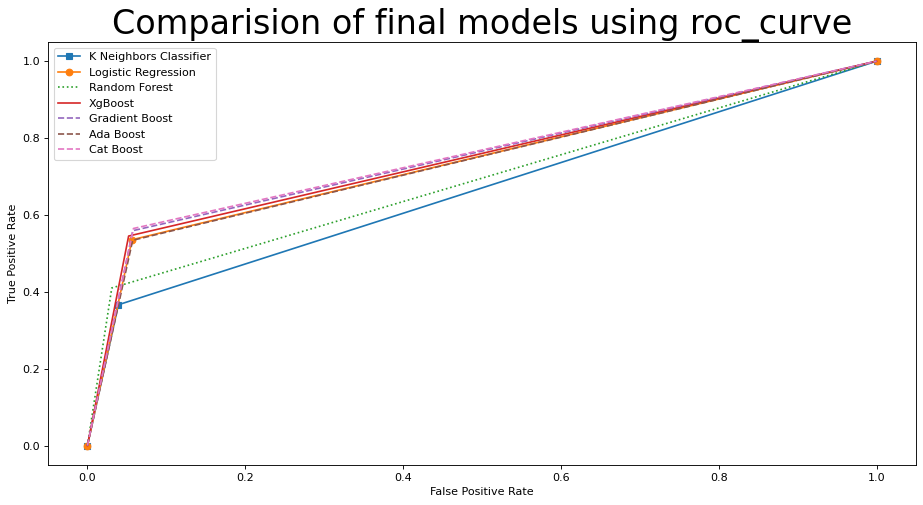

In [ ]:
########Comparision of final models using roc_curve

from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

lgr_fpr2, lgr_tpr2, _ = roc_curve(y_test, lgr_y_pred2)
#sv_fpr2, sv_tpr2, _ = roc_curve(y_test, sv_y_pred2)
rf_fpr2, rf_tpr2, _ = roc_curve(y_test, rf_y_pred2)
knn_fpr2, knn_tpr2, _ = roc_curve(y_test, knn_y_pred2)
xg_fpr2, xg_tpr2, _ = roc_curve(y_test, xg_y_pred2)
gb_fpr2, gb_tpr2, _ = roc_curve(y_test, gb_y_pred2)
ada_fpr2, ada_tpr2, _ = roc_curve(y_test, ada_y_pred2)
cat_fpr2, cat_tpr2, _ = roc_curve(y_test, cat_y_pred2)

# plot the roc curve for the model
pyplot.plot(knn_fpr2, knn_tpr2, marker='s', label='K Neighbors Classifier')
pyplot.plot(lgr_fpr2, lgr_tpr2, marker='o', label='Logistic Regression')
#pyplot.plot(sv_fpr2, sv_tpr2, marker='v', label='Support Vector Classifier')
pyplot.plot(rf_fpr2, rf_tpr2, linestyle=':', label='Random Forest')
pyplot.plot(xg_fpr2, xg_tpr2, linestyle='-', label='XgBoost')
pyplot.plot(gb_fpr2, gb_tpr2, linestyle='--', label='Gradient Boost')
pyplot.plot(ada_fpr2, ada_tpr2, linestyle='--', label='Ada Boost')
pyplot.plot(cat_fpr2, cat_tpr2, linestyle='--', label='Cat Boost')


# axis labels

# incorrectly predicts the positive class
pyplot.xlabel('False Positive Rate')

# correctly predicts the positive class
pyplot.ylabel('True Positive Rate')

pyplot.title("Comparision of final models using roc_curve", fontsize=30)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Printing values for AUC
result7 =[]
k2=auc(knn_fpr2, knn_tpr2)
result7.append(k2)

l2=auc(lgr_fpr2, lgr_tpr2)
result7.append(l2)

r2=auc(rf_fpr2, rf_tpr2)
result7.append(r2)

x2=auc(xg_fpr2, xg_tpr2)
result7.append(x2)

g2=auc(gb_fpr2, gb_tpr2)
result7.append(g2)

a2=auc(ada_fpr2, ada_tpr2)
result7.append(a2)

c2=auc(cat_fpr2, cat_tpr2)
result7.append(c2)

In [ ]:
results2 = pd.DataFrame({ "Models":[
                                  "Logistic",
                                  "RandomForest",
                                  "KNN",
                                  "Catboost",
                                  "XG-Boost",
                                  "GradientBoost",
                                  "AdaBoost"
                                  ],
                        "Train Accuracy":result8,
                        "Model Accuracy":result9,
                        "AUC":result7
                        })

In [ ]:
results2

,Models,Train Accuracy,Model Accuracy,AUC
0,Logistic,0.797646,0.853052,0.663576
1,RandomForest,0.805670,0.845130,0.739523
2,KNN,0.923210,0.828983,0.689582
3,Catboost,0.904166,0.858079,0.746451
4,XG-Boost,0.897673,0.858485,0.750791
5,GradientBoost,0.899415,0.857469,0.738379
6,AdaBoost,0.875313,0.852036,0.753229


# Model saving

In [ ]:
import pickle

In [ ]:
pickle.dump(xg2,open('Final_model_xg.pkl','wb'))

In [ ]:
xgg=pickle.load(open('Final_model_xg.pkl','rb'))

In [ ]:
df.head(40)

In [ ]:
xgg.predict([[23.6 ,	40.4 ,	0.6 ,	11.8 ,	12.2 ,54.0 ,9.0 ,	11.0, 	42.0, 	17.0, 	1008.4, 	1005.0, 	1.0, 	2.0, 	29.9, 	38.7, 	0 ]])

array([0])

# END